In [ ]:
%pip install statsmodels
%pip install bayesian_changepoint_detection
%pip install pyhomogeneity
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install plotly
%pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pyhomogeneity as hg
import plotly.express as px

## Loading the data

In [2]:
data = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding = 'latin1')
data.head(5)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


## Data Preprocessing

Remove rows pertaining to standard deviation

In [3]:
data = data[data["Element"] == "Temperature change"]
data.head(2)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086


Drop irrelevant columns

In [4]:
data.drop(columns=['Area Code', 'Element Code','Element', 'Unit'], axis=1, inplace=True)
data.head(5)

,Area,Months Code,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,7001,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,7002,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,7003,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,7004,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,7005,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


Replace decoding errors

In [ ]:
data['Months'].replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter',
}, inplace=True)

Transform dataframe to have a column for year

In [6]:
data = data.melt(id_vars=['Area','Months','Months Code'],var_name='Year', value_name='Temperature Change')
data["Year"] = data["Year"].apply(lambda x: x.lstrip("Y"))
data["Year"] = pd.to_numeric(data["Year"])
data.head(5)

,Area,Months,Months Code,Year,Temperature Change
0,Afghanistan,January,7001,1961,0.777
1,Afghanistan,February,7002,1961,-1.743
2,Afghanistan,March,7003,1961,0.516
3,Afghanistan,April,7004,1961,-1.709
4,Afghanistan,May,7005,1961,1.412


Remove months with null temperature change

In [7]:
data.dropna(subset=["Temperature Change"], inplace=True)

## Data Analysis

### Can we identify recurring seasonal patterns in temperature anomalies within the dataset, and if so, which countries show the most pronounced seasonal variations?

BY CONTINENT

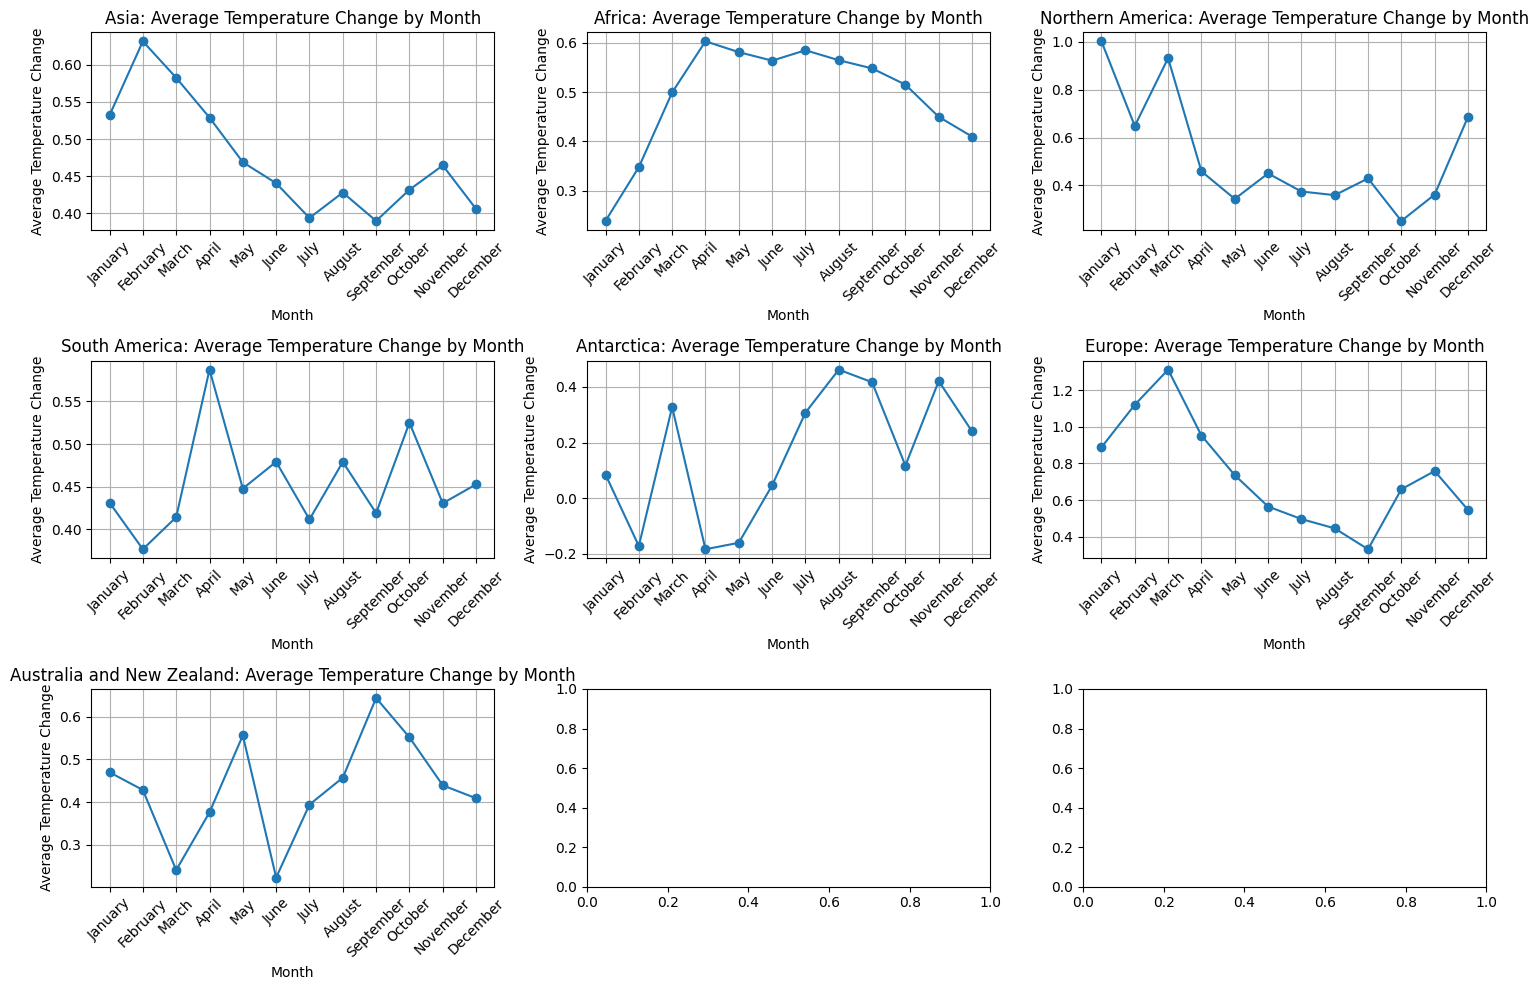

,Min. Changes,Max. Changes
Asia,0.3899491525423729 (September),0.6312711864406779 (February)
Africa,0.23913559322033898 (January),0.602813559322034 (April)
Northern America,0.2523050847457627 (October),1.001135593220339 (January)
South America,0.3764237288135593 (February),0.5873898305084746 (April)
Antarctica,-0.18296610169491526 (April),0.4616779661016949 (August)
Europe,0.3310169491525424 (September),1.3128305084745762 (March)
Australia and New Zealand,0.22261016949152543 (June),0.6443728813559322 (September)


In [8]:
# Define continents
continents = ["Asia", "Africa", "Northern America", "South America", "Antarctica", "Europe", "Australia and New Zealand"]

# Create subplots
# Calculate number of rows and columns for subplots
num_rows = (len(continents) + 2) // 3  # Add 2 to ensure that we round up
num_cols = min(len(continents), 3)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

min_changes = {}
max_changes = {}

# Iterate over continents
for i, continent in enumerate(continents):
    # Filter data for the continent
    # Calculate subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    continent_data = data[(data["Area"] == continent)&(data["Months Code"] < 7016)]

    # Calculate average temperature change by month
    monthly_avg = continent_data.groupby('Months', sort=False)['Temperature Change'].mean().reset_index()

    # Calculate minimum and maximum temperature changes
    min_index = monthly_avg['Temperature Change'].idxmin()
    max_index = monthly_avg['Temperature Change'].idxmax()
    min_change = monthly_avg.loc[min_index, 'Temperature Change']
    max_change = monthly_avg.loc[max_index, 'Temperature Change']
    min_month = monthly_avg.loc[min_index, 'Months']
    max_month = monthly_avg.loc[max_index, 'Months']

    min_changes[continent] = f"{min_change} ({min_month})"
    max_changes[continent] = f"{max_change} ({max_month})"

    # Plot on the corresponding subplot
    axs[row_index][col_index].plot(monthly_avg['Months'], monthly_avg['Temperature Change'], marker='o')
    axs[row_index][col_index].set_title(continent + ': Average Temperature Change by Month')
    axs[row_index][col_index].set_xlabel('Month')
    axs[row_index][col_index].set_ylabel('Average Temperature Change')
    axs[row_index][col_index].set_xticks(monthly_avg.index)
    axs[row_index][col_index].set_xticklabels(monthly_avg['Months'], rotation=45)
    axs[row_index][col_index].grid(True)

plt.tight_layout()
plt.show()
temp_changes = pd.DataFrame(data={"Min. Changes":min_changes, "Max. Changes": max_changes})
temp_changes

BY ANNEX I COUNTRIES:
- This is used as an indicator of industrialization

> Annex I Parties include the industrialized countries that were members of the OECD (Organisation for Economic Co-operation and Development) in 1992, plus countries with economies in transition (the EIT Parties), including the Russian Federation, the Baltic States, and several Central and Eastern European States. (UNFCC,n.d.)


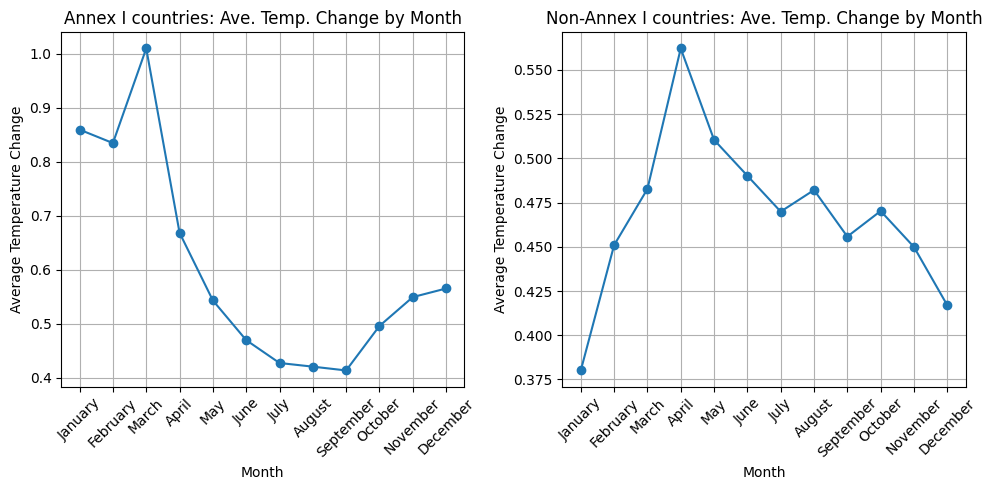

,Min. Changes,Max. Changes
Annex I countries,0.41322033898305083 (September),1.009542372881356 (March)
Non-Annex I countries,0.3801016949152542 (January),0.5621864406779661 (April)


In [9]:
# Define categories
annex1_countries = ["Annex I countries","Non-Annex I countries"]

# Create subplots
# Calculate number of rows and columns for subplots
num_rows = (len(annex1_countries) + 2) // 3  # Add 2 to ensure that we round up
num_cols = min(len(annex1_countries), 3)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))

min_changes = {}
max_changes = {}

# Iterate over categories
for i, category in enumerate(annex1_countries):
    # Filter data for the category
    category_data = data[(data["Area"] == category)&(data["Months Code"] < 7016)]

    # Calculate average temperature change by month
    monthly_avg = category_data.groupby('Months', sort=False)['Temperature Change'].mean().reset_index()

    # Calculate minimum and maximum temperature changes
    min_index = monthly_avg['Temperature Change'].idxmin()
    max_index = monthly_avg['Temperature Change'].idxmax()
    min_change = monthly_avg.loc[min_index, 'Temperature Change']
    max_change = monthly_avg.loc[max_index, 'Temperature Change']
    min_month = monthly_avg.loc[min_index, 'Months']
    max_month = monthly_avg.loc[max_index, 'Months']

    min_changes[category] = f"{min_change} ({min_month})"
    max_changes[category] = f"{max_change} ({max_month})"

    # Plot on the corresponding subplot
    axs[i].plot(monthly_avg['Months'], monthly_avg['Temperature Change'], marker='o')
    axs[i].set_title(category + ': Ave. Temp. Change by Month')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Temperature Change')
    axs[i].set_xticks(monthly_avg.index)
    axs[i].set_xticklabels(monthly_avg['Months'], rotation=45)
    axs[i].grid(True)

plt.tight_layout()
plt.show()
temp_changes = pd.DataFrame(data={"Min. Changes":min_changes, "Max. Changes": max_changes})
temp_changes

### Do abrupt changes or shifts in temperature anomalies occur within certain countries or regions, and can we characterize these patterns?

In [187]:
# Group data by 'Area' (country or region) and apply Pettitt's test for outlier detection
outliers_data = []

for area, group in data.groupby('Area'):
    group = group[(group["Months"] == "Meteorological year")].reset_index()
    # Extract temperature anomaly values for the area
    temperature_anomaly = group['Temperature Change']
    years = group['Year']

    # Perform Pettitt's test for outlier detection
    result = hg.pettitt_test(temperature_anomaly)

    # Add change point and p-value to dictionary
    if result.h:
        # Calculate magnitude and duration of change
        start_index = result.cp
        end_index = len(temperature_anomaly) - 1
        magnitude = temperature_anomaly[end_index] - temperature_anomaly[start_index]
        duration = len(temperature_anomaly) - start_index

        outliers_data.append({
            'Area': area,
            'Change Point': temperature_anomaly.iloc[result.cp],
            'Change Year': years.iloc[result.cp],
            'P-value': result.p,
            'Is Outlier': result.h,
            'Magnitude': magnitude,
            'Duration': duration
        })

# Create DataFrame
outliers_df = pd.DataFrame(outliers_data)
outliers_df

,Area,Change Point,Change Year,P-value,Is Outlier,Magnitude,Duration
0,Afghanistan,0.480,1997,0.0000,True,0.413,23
1,Africa,0.418,1994,0.0000,True,0.997,26
2,Albania,0.865,1998,0.0000,True,1.046,22
3,Algeria,0.796,1994,0.0000,True,0.428,26
4,American Samoa,0.520,1990,0.0000,True,0.982,25
...,...,...,...,...,...,...,...
261,Western Sahara,0.906,1994,0.0000,True,0.654,26
262,World,0.501,1994,0.0000,True,0.972,26
263,Yemen,0.389,1977,0.0031,True,-0.293,15
264,Zambia,0.942,1987,0.0000,True,0.514,33


### Are there correlations between the temperature changes and other factors such as location, environmental factors, and population within the dataset, and if so, how do these correlations manifest as patterns?

Group countries by climate zone

In [16]:
# Define a dictionary mapping each country to its climate zone
country_climate_zones = {
    'Afghanistan': 'Temperate Zone',
    'Albania': 'Temperate Zone',
    'Algeria': 'Arid Zone',
    'American Samoa': 'Tropical Zone',
    'Andorra': 'Temperate Zone',
    'Angola': 'Tropical Zone',
    'Anguilla': 'Tropical Zone',
    'Antarctica': 'Polar Zone',
    'Antigua and Barbuda': 'Tropical Zone',
    'Argentina': 'Temperate Zone',
    'Armenia': 'Temperate Zone',
    'Aruba': 'Tropical Zone',
    'Australia': 'Temperate Zone',
    'Austria': 'Temperate Zone',
    'Azerbaijan': 'Temperate Zone',
    'Bahamas': 'Tropical Zone',
    'Bahrain': 'Arid Zone',
    'Bangladesh': 'Tropical Zone',
    'Barbados': 'Tropical Zone',
    'Belarus': 'Temperate Zone',
    'Belgium': 'Temperate Zone',
    'Belize': 'Tropical Zone',
    'Benin': 'Tropical Zone',
    'Bhutan': 'Temperate Zone',
    'Bolivia (Plurinational State of)': 'Temperate Zone',
    'Bosnia and Herzegovina': 'Temperate Zone',
    'Botswana': 'Arid Zone',
    'Brazil': 'Tropical Zone',
    'British Virgin Islands': 'Tropical Zone',
    'Brunei Darussalam': 'Tropical Zone',
    'Bulgaria': 'Temperate Zone',
    'Burkina Faso': 'Tropical Zone',
    'Burundi': 'Tropical Zone',
    'Cabo Verde': 'Tropical Zone',
    'Cambodia': 'Tropical Zone',
    'Cameroon': 'Tropical Zone',
    'Canada': 'Temperate Zone',
    'Cayman Islands': 'Tropical Zone',
    'Central African Republic': 'Tropical Zone',
    'Chad': 'Tropical Zone',
    'Channel Islands': 'Temperate Zone',
    'Chile': 'Temperate Zone',
    'China': 'Temperate Zone',
    'China, Hong Kong SAR': 'Tropical Zone',
    'China, Macao SAR': 'Tropical Zone',
    'China, mainland': 'Temperate Zone',
    'China, Taiwan Province of': 'Tropical Zone',
    'Christmas Island': 'Tropical Zone',
    'Cocos (Keeling) Islands': 'Tropical Zone',
    'Colombia': 'Tropical Zone',
    'Comoros': 'Tropical Zone',
    'Congo': 'Tropical Zone',
    'Cook Islands': 'Tropical Zone',
    'Costa Rica': 'Tropical Zone',
    "Côte d'Ivoire": 'Tropical Zone',
    'Croatia': 'Temperate Zone',
    'Cuba': 'Tropical Zone',
    'Cyprus': 'Arid Zone',
    'Czechia': 'Temperate Zone',
    'Czechoslovakia': 'Temperate Zone',
    "Democratic People's Republic of Korea": 'Temperate Zone',
    'Democratic Republic of the Congo': 'Tropical Zone',
    'Denmark': 'Temperate Zone',
    'Djibouti': 'Arid Zone',
    'Dominica': 'Tropical Zone',
    'Dominican Republic': 'Tropical Zone',
    'Ecuador': 'Tropical Zone',
    'Egypt': 'Arid Zone',
    'El Salvador': 'Tropical Zone',
    'Equatorial Guinea': 'Tropical Zone',
    'Eritrea': 'Arid Zone',
    'Estonia': 'Temperate Zone',
    'Eswatini': 'Temperate Zone',
    'Ethiopia': 'Tropical Zone',
    'Ethiopia PDR': 'Tropical Zone',
    'Falkland Islands (Malvinas)': 'Temperate Zone',
    'Faroe Islands': 'Temperate Zone',
    'Fiji': 'Tropical Zone',
    'Finland': 'Temperate Zone',
    'France': 'Temperate Zone',
    'French Guiana': 'Tropical Zone',
    'French Polynesia': 'Tropical Zone',
    'French Southern and Antarctic Territories': 'Polar Zone',
    'Gabon': 'Tropical Zone',
    'Gambia': 'Tropical Zone',
    'Georgia': 'Temperate Zone',
    'Germany': 'Temperate Zone',
    'Ghana': 'Tropical Zone',
    'Gibraltar': 'Temperate Zone',
    'Greece': 'Temperate Zone',
    'Greenland': 'Polar Zone',
    'Grenada': 'Tropical Zone',
    'Guadeloupe': 'Tropical Zone',
    'Guatemala': 'Tropical Zone',
    'Guinea': 'Tropical Zone',
    'Guinea-Bissau': 'Tropical Zone',
    'Guyana': 'Tropical Zone',
    'Haiti': 'Tropical Zone',
    'Holy See': 'Temperate Zone',
    'Honduras': 'Tropical Zone',
    'Hungary': 'Temperate Zone',
    'Iceland': 'Temperate Zone',
    'India': 'Tropical Zone',
    'Indonesia': 'Tropical Zone',
    'Iran (Islamic Republic of)': 'Arid Zone',
    'Iraq': 'Arid Zone',
    'Ireland': 'Temperate Zone',
    'Isle of Man': 'Temperate Zone',
    'Israel': 'Arid Zone',
    'Italy': 'Temperate Zone',
    'Jamaica': 'Tropical Zone',
    'Japan': 'Temperate Zone',
    'Jordan': 'Arid Zone',
    'Kazakhstan': 'Temperate Zone',
    'Kenya': 'Tropical Zone',
    'Kiribati': 'Tropical Zone',
    'Kuwait': 'Arid Zone',
    'Kyrgyzstan': 'Temperate Zone',
    "Lao People's Democratic Republic": 'Tropical Zone',
    'Latvia': 'Temperate Zone',
    'Lebanon': 'Arid Zone',
    'Lesotho': 'Temperate Zone',
    'Liberia': 'Tropical Zone',
    'Libya': 'Arid Zone',
    'Liechtenstein': 'Temperate Zone',
    'Lithuania': 'Temperate Zone',
    'Luxembourg': 'Temperate Zone',
    'Madagascar': 'Tropical Zone',
    'Malawi': 'Tropical Zone',
    'Malaysia': 'Tropical Zone',
    'Maldives': 'Tropical Zone',
    'Mali': 'Tropical Zone',
    'Malta': 'Temperate Zone',
    'Marshall Islands': 'Tropical Zone',
    'Martinique': 'Tropical Zone',
    'Mauritania': 'Tropical Zone',
    'Mauritius': 'Tropical Zone',
    'Mayotte': 'Tropical Zone',
    'Mexico': 'Tropical Zone',
    'Micronesia (Federated States of)': 'Tropical Zone',
    'Midway Island': 'Tropical Zone',
    'Monaco': 'Temperate Zone',
    'Mongolia': 'Temperate Zone',
    'Montenegro': 'Temperate Zone',
    'Montserrat': 'Tropical Zone',
    'Morocco': 'Arid Zone',
    'Mozambique': 'Tropical Zone',
    'Myanmar': 'Tropical Zone',
    'Namibia': 'Arid Zone',
    'Nauru': 'Tropical Zone',
    'Nepal': 'Temperate Zone',
    'Netherlands': 'Temperate Zone',
    'Netherlands Antilles (former)': 'Tropical Zone',
    'New Caledonia': 'Tropical Zone',
    'New Zealand': 'Temperate Zone',
    'Nicaragua': 'Tropical Zone',
    'Niger': 'Tropical Zone',
    'Nigeria': 'Tropical Zone',
    'Niue': 'Tropical Zone',
    'Norfolk Island': 'Tropical Zone',
    'North Macedonia': 'Temperate Zone',
    'Norway': 'Temperate Zone',
    'Oman': 'Arid Zone',
    'Pacific Islands Trust Territory': 'Tropical Zone',
    'Pakistan': 'Arid Zone',
    'Palau': 'Tropical Zone',
    'Palestine': 'Arid Zone',
    'Panama': 'Tropical Zone',
    'Papua New Guinea': 'Tropical Zone',
    'Paraguay': 'Tropical Zone',
    'Peru': 'Tropical Zone',
    'Philippines': 'Tropical Zone',
    'Pitcairn Islands': 'Tropical Zone',
    'Poland': 'Temperate Zone',
    'Portugal': 'Temperate Zone',
    'Puerto Rico': 'Tropical Zone',
    'Qatar': 'Arid Zone',
    'Republic of Korea': 'Temperate Zone',
    'Republic of Moldova': 'Temperate Zone',
    'Réunion': 'Tropical Zone',
    'Romania': 'Temperate Zone',
    'Russian Federation': 'Temperate Zone',
    'Rwanda': 'Tropical Zone',
    'Saint Helena, Ascension and Tristan da Cunha': 'Tropical Zone',
    'Saint Kitts and Nevis': 'Tropical Zone',
    'Saint Lucia': 'Tropical Zone',
    'Saint Pierre and Miquelon': 'Temperate Zone',
    'Saint Vincent and the Grenadines': 'Tropical Zone',
    'Samoa': 'Tropical Zone',
    'San Marino': 'Temperate Zone',
    'Sao Tome and Principe': 'Tropical Zone',
    'Saudi Arabia': 'Arid Zone',
    'Senegal': 'Tropical Zone',
    'Serbia': 'Temperate Zone',
    'Serbia and Montenegro': 'Temperate Zone',
    'Seychelles': 'Tropical Zone',
    'Sierra Leone': 'Tropical Zone',
    'Singapore': 'Tropical Zone',
    'Slovakia': 'Temperate Zone',
    'Slovenia': 'Temperate Zone',
    'Solomon Islands': 'Tropical Zone',
    'Somalia': 'Arid Zone',
    'South Africa': 'Tropical Zone',
    'South Georgia and the South Sandwich Islands': 'Polar Zone',
    'South Sudan': 'Tropical Zone',
    'Spain': 'Temperate Zone',
    'Sri Lanka': 'Tropical Zone',
    'Sudan': 'Tropical Zone',
    'Sudan (former)': 'Tropical Zone',
    'Suriname': 'Tropical Zone',
    'Svalbard and Jan Mayen Islands': 'Polar Zone',
    'Sweden': 'Temperate Zone',
    'Switzerland': 'Temperate Zone',
    'Syrian Arab Republic': 'Arid Zone',
    'Tajikistan': 'Temperate Zone',
    'Thailand': 'Tropical Zone',
    'Timor-Leste': 'Tropical Zone',
    'Togo': 'Tropical Zone',
    'Tokelau': 'Tropical Zone',
    'Tonga': 'Tropical Zone',
    'Trinidad and Tobago': 'Tropical Zone',
    'Tunisia': 'Arid Zone',
    'Turkey': 'Temperate Zone',
    'Turkmenistan': 'Arid Zone',
    'Turks and Caicos Islands': 'Tropical Zone',
    'Tuvalu': 'Tropical Zone',
    'Uganda': 'Tropical Zone',
    'Ukraine': 'Temperate Zone',
    'United Arab Emirates': 'Arid Zone',
    'United Kingdom': 'Temperate Zone',
    'United Republic of Tanzania': 'Tropical Zone',
    'United States of America': 'Temperate Zone',
    'United States Virgin Islands': 'Tropical Zone',
    'Uruguay': 'Temperate Zone',
    'Uzbekistan': 'Temperate Zone',
    'Vanuatu': 'Tropical Zone',
    'Venezuela (Bolivarian Republic of)': 'Tropical Zone',
    'Viet Nam': 'Tropical Zone',
    'Wake Island': 'Tropical Zone',
    'Wallis and Futuna Islands': 'Tropical Zone',
    'Western Sahara': 'Arid Zone',
    'Yemen': 'Arid Zone',
    'Yugoslav SFR': 'Temperate Zone',
    'Zambia': 'Tropical Zone',
    'Zimbabwe': 'Tropical Zone'
}

In [17]:
climatic_zone_df = data.copy()
climatic_zone_df["Climate Zone"] = climatic_zone_df["Area"].map(country_climate_zones)
climatic_zone_df.head(2)

,Area,Months,Months Code,Year,Temperature Change,Climate Zone
0,Afghanistan,January,7001,1961,0.777,Temperate Zone
1,Afghanistan,February,7002,1961,-1.743,Temperate Zone


In [18]:
average_temp_change_by_zone = climatic_zone_df.groupby(['Climate Zone','Year',"Months"],sort=False)['Temperature Change'].mean().reset_index()

Correlation of Population & Mean Temperature Change

In [19]:
population_df = pd.read_csv('Global_annual_population.csv')
population_df = population_df[["Year","Population"]]
population_df.head(2)

,Year,Population
0,1960,3.03
1,1961,3.07


In [20]:
temp = data.loc[(data["Area"]=="World")&(data["Months"]=="Meteorological year")]
population_temp_df = pd.merge(temp[["Year","Temperature Change"]], population_df, how="inner", on="Year")
population_temp_df.head(2)

,Year,Temperature Change,Population
0,1961,0.207,3.07
1,1962,0.034,3.12


In [21]:
granger_result = grangercausalitytests(population_temp_df[["Temperature Change","Population"]], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=45.5547 , p=0.0000  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=48.0395 , p=0.0000  , df=1
likelihood ratio test: chi2=34.9954 , p=0.0000  , df=1
parameter F test:         F=45.5547 , p=0.0000  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.2777 , p=0.0000  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=40.0703 , p=0.0000  , df=2
likelihood ratio test: chi2=30.3459 , p=0.0000  , df=2
parameter F test:         F=18.2777 , p=0.0000  , df_denom=52, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.0700 , p=0.0000  , df_denom=49, df_num=3
ssr based chi2 test:   chi2=34.5256 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8957 , p=0.0000  , df=3
parameter F test:         F=10.0700 , p=0.0000  , df_denom=49, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.5658  , p=0.0034  , df_d

population increase correlated with temperature increase from lag 1. (p-value < 0.05)

Correlation of temperature change and artic mass

In [22]:
artic_df = pd.read_csv("arctic_ice_extent.csv")
artic_df.columns = ["Year","Extent"]
artic_df.head(2)

,Year,Extent
0,1979,6.903
1,1980,7.544


In [23]:
temp = data.loc[(data["Area"]=="World")&(data["Months"]=="Meteorological year")]
artic_temp_df = pd.merge(temp[["Year","Temperature Change"]], artic_df, how="inner", on="Year")
artic_temp_df.head(2)

,Year,Temperature Change,Extent
0,1979,0.225,6.903
1,1980,0.330,7.544


In [24]:
granger_result = grangercausalitytests(artic_temp_df[["Temperature Change","Extent"]], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1405  , p=0.7099  , df_denom=37, df_num=1
ssr based chi2 test:   chi2=0.1519  , p=0.6967  , df=1
likelihood ratio test: chi2=0.1516  , p=0.6970  , df=1
parameter F test:         F=0.1405  , p=0.7099  , df_denom=37, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0165  , p=0.1487  , df_denom=34, df_num=2
ssr based chi2 test:   chi2=4.6260  , p=0.0990  , df=2
likelihood ratio test: chi2=4.3716  , p=0.1124  , df=2
parameter F test:         F=2.0165  , p=0.1487  , df_denom=34, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6552  , p=0.1969  , df_denom=31, df_num=3
ssr based chi2 test:   chi2=6.0870  , p=0.1075  , df=3
likelihood ratio test: chi2=5.6460  , p=0.1302  , df=3
parameter F test:         F=1.6552  , p=0.1969  , df_denom=31, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0140  , p=0.0347  , df_d

p>0.05 in the first three lags; no connection

Correlation of Sea Level Rise and Temperature Change

In [40]:
sea_level_df = pd.read_csv("sealevel.csv")
sea_level_df = sea_level_df.drop(columns=["TotalWeightedObservations","StdDevGMSL_noGIA","SmoothedGSML_noGIA","GMSL_GIA","StdDevGMSL_GIA","SmoothedGSML_GIA","SmoothedGSML_GIA_sigremoved"])
sea_level_df.columns = ["Year", "Sea Level"]
sea_level_df.head(2)

,Year,Sea Level
0,1993,-38.59
1,1993,-41.97


In [41]:
temp = data.loc[(data["Area"]=="World")&(data["Months"]=="Meteorological year")]
sea_temp_df = pd.merge(temp[["Year","Temperature Change"]], sea_level_df, how="inner", on="Year")
sea_temp_df.head(2)

,Year,Temperature Change,Sea Level
0,1993,0.346,-38.59
1,1993,0.346,-41.97


In [43]:
granger_result = grangercausalitytests(sea_temp_df[["Temperature Change","Sea Level"]], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.7813 , p=0.0004  , df_denom=990, df_num=1
ssr based chi2 test:   chi2=12.8200 , p=0.0003  , df=1
likelihood ratio test: chi2=12.7379 , p=0.0004  , df=1
parameter F test:         F=12.7813 , p=0.0004  , df_denom=990, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.4524  , p=0.0016  , df_denom=987, df_num=2
ssr based chi2 test:   chi2=12.9702 , p=0.0015  , df=2
likelihood ratio test: chi2=12.8862 , p=0.0016  , df=2
parameter F test:         F=6.4524  , p=0.0016  , df_denom=987, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5276  , p=0.0037  , df_denom=984, df_num=3
ssr based chi2 test:   chi2=13.6795 , p=0.0034  , df=3
likelihood ratio test: chi2=13.5860 , p=0.0035  , df=3
parameter F test:         F=4.5276  , p=0.0037  , df_denom=984, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3572  , p=0.0017  

sea level increase correlated with temperature increase from lag 1. (p-value < 0.05)

### What is the change in temperature per climate zone?

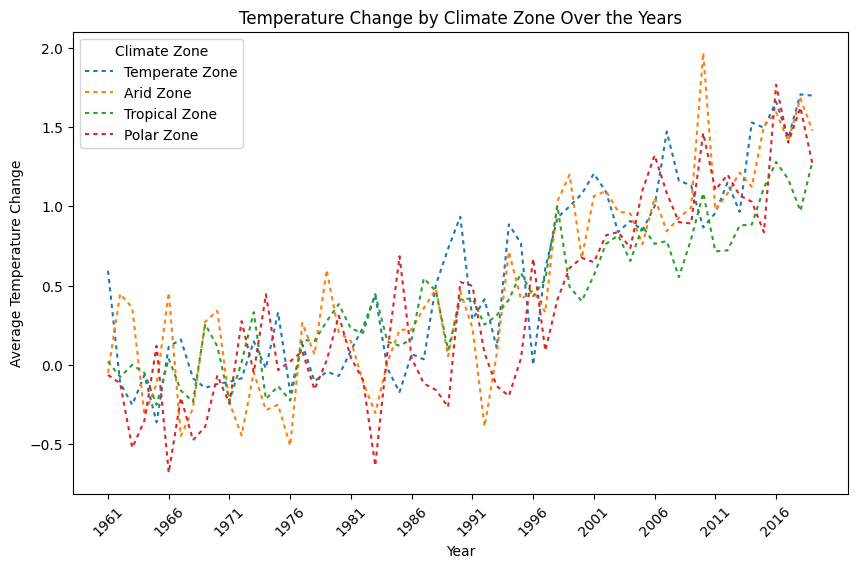

In [14]:
# Plotting the temperature change every year per climate zone
plt.figure(figsize=(10, 6))
ave_temp_change_by_zone_month = average_temp_change_by_zone[(average_temp_change_by_zone["Months"]=="Meteorological year")]
# Using seaborn's lineplot
sns.lineplot(data=ave_temp_change_by_zone_month, x='Year', y='Temperature Change', hue='Climate Zone', palette='tab10', dashes=(2,2))

plt.title('Temperature Change by Climate Zone Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change')
plt.legend(title='Climate Zone')

# Rotate the x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Skip every decade
tick_years = np.arange(average_temp_change_by_zone['Year'].min(), average_temp_change_by_zone['Year'].max()+1, 5)
plt.xticks(tick_years)

plt.show()

### Is there a seasonal pattern in each climate zone's temperature change?

In [27]:
# Function to estimate period using autocorrelation
def estimate_period_autocorr(data):
    # Compute autocorrelation function
    acf_res = acf(data, nlags=len(data)-1)
    # Find the first significant peak after lag 1
    significant_peak = np.argmax(acf_res[1:]) + 1
    return significant_peak

Climate Zone: Arid Zone
Estimated Period: 1.00


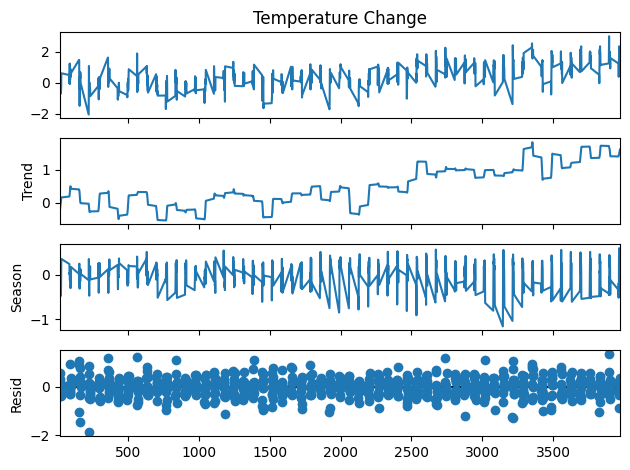

Climate Zone: Polar Zone
Estimated Period: 1.00


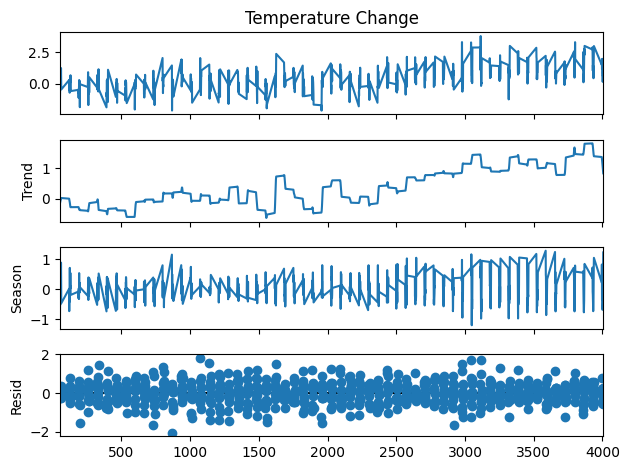

Climate Zone: Temperate Zone
Estimated Period: 1.00


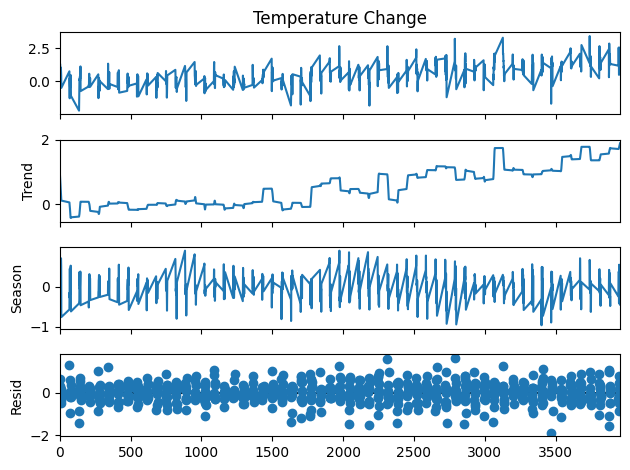

Climate Zone: Tropical Zone
Estimated Period: 1.00


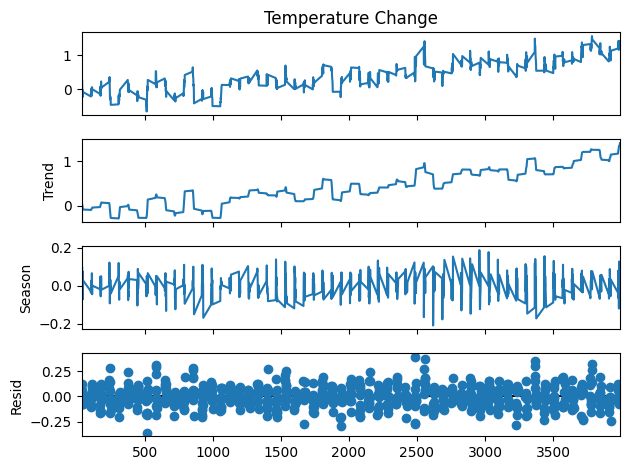

In [54]:
# Grouping by Climate Zone and Year
for zone, zone_group in average_temp_change_by_zone.groupby("Climate Zone"):
    print(f"Climate Zone: {zone}")

    # Remove non-month entries
    zone_group = zone_group.loc[~zone_group["Months"].isin(["Meteorological year","Summer","Fall","Spring","Winter"])]

    # Estimate the period using Autocorrelation
    estimated_period = estimate_period_autocorr(zone_group["Temperature Change"])
    print(f"Estimated Period: {estimated_period:.2f}")

    # Perform seasonal decomposition with the estimated period
    #result = seasonal_decompose(zone_group["Temperature Change"], model="additive", period=12) #using seasonal_decompose
    stl = STL(zone_group["Temperature Change"], period=12) #using STL
    res = stl.fit()
    fig = res.plot()
    # Plot the decomposition
    #result.plot()
    plt.show()

### What is the trend of temperature change by season (winter, spring, summer, fall)?

In [8]:
# Create filter for World temp. change by season
world_filter = data["Area"] == 'World'
seasons_filter = data["Months"].isin(['Winter', 'Spring', 'Summer', 'Fall'])

seasons_variations = data.loc[seasons_filter & world_filter, ['Months', 'Year', 'Temperature Change']].reset_index(drop=True)
seasons_variations["Year"] = seasons_variations["Year"].astype(str)

fig = px.line(
    seasons_variations,
    x='Year',
    y='Temperature Change',
    color = 'Months',
    color_discrete_map={
        'Winter':'blue',
        'Spring':'green',
        'Summer':'red',
        'Fall':'orange'},
    hover_name='Months',
    hover_data=dict(Months=None),
    labels=dict(
        months='Season',
        years='Years',
        temp_changes="Temperature Change (°C)"))

fig.update_layout(
    width=950,
    height=550,
    title="Worldwide Temperature Changes by Seasons from 1961 to 2019",
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 4),
    legend_itemclick=False)


x = (55, 55, 55, 54)
y = (2.165, 1.999, 1.359, 1.471)
ax = (-50, -90, -145, -100)
ay = (-30, -20, -60, -70)
seasons = ('Winter', 'Spring', 'Summer', 'Fall')
colors = ('blue', 'green', 'red', 'orange')

for n in range(4):
    fig.add_annotation(
    y=y[n],
    x=x[n],
    text=f"Hottest {seasons[n]}",
    font=dict(color="white", size=10),
    showarrow=True,
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=ax[n],
    ay=ay[n],
    bgcolor=f"{colors[n]}")

fig.update_traces(
    line_dash='dashdot',
    line_shape='spline')

fig.show()

### What is the predicted temperature in the Philippines and across the globe by 2050?

Predicted temperature in the Philippines by 2050

In [33]:
ph_df = data[(data["Area"]=="Philippines")].reset_index()
ph_df = ph_df.loc[~ph_df["Months"].isin(["Meteorological year","Summer","Fall","Spring","Winter"])].reset_index()

In [34]:
# Check if stationary
adfuller_temp = adfuller(ph_df['Temperature Change'])
pd.DataFrame({
    'Adfuller Statistical Value': [adfuller_temp[0]],
    'P-value': [adfuller_temp[1]],
    '1% Crit. Value': [adfuller_temp[4]["1%"]],
    '5% Crit. Value': [adfuller_temp[4]["5%"]],
    '10% Crit. Value': [adfuller_temp[4]["10%"]],
    'Stationary?':["Stationary" if adfuller_temp[1] < 0.05 else "Non-stationary"]})

,Adfuller Statistical Value,P-value,1% Crit. Value,5% Crit. Value,10% Crit. Value,Stationary?
0,-2.74048,0.067292,-3.43978,-2.865702,-2.568986,Non-stationary


In [ ]:
# Optimizing order parameters for SARIMAX
param_grid = {
#    'order': [(p, d, q) for p in range(1,3) for d in range(1,3) for q in range(1,3)],
    'order': [(1,1,1)],
    'seasonal_order': [(1,1,1,52),(2,1,1,52),(1,2,1,52),(1,1,2,52)],
}

best_score = float('inf')
best_params = None

for order in param_grid['order']:
    for seasonal_order in param_grid['seasonal_order']:
      print(order, seasonal_order)
      model = SARIMAX(ph_df['Temperature Change'], order=order, seasonal_order=seasonal_order, enforce_stationarity=True)
      fitted_model = model.fit()
      score = fitted_model.aic

      if score < best_score:
          best_score = score
          best_params = {'order': order, 'seasonal_order':seasonal_order}

print("Best Parameters:", best_params)

(1, 1, 1) (1, 1, 1, 52)
(1, 1, 1) (2, 1, 1, 52)
(1, 1, 1) (1, 2, 1, 52)
(1, 1, 1) (1, 1, 2, 52)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best Parameters: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52)}


In [35]:
model = SARIMAX(ph_df['Temperature Change'], order=(1,1,1), seasonal_order=(1,1,1,52))
#model = SARIMAX(ph_df['Temperature Change'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
results = model.fit()
forecast_steps = 31 * 12
forecast = results.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

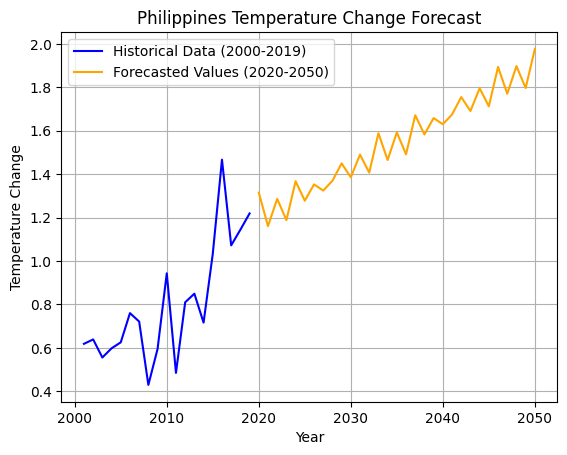

In [38]:
# Calculate yearly average of forecasted values
forecasted_values_yearly = []
for i in range(0, int(forecast_steps/12)):
    forecasted_values_yearly.append(np.mean(forecasted_values[i*12:(i*12)+12]))

# Plot historical data from 2000 to 2019
ph_data = ph_df.loc[(ph_df["Year"]>2000)]
ph_data = ph_data.groupby("Year")["Temperature Change"].mean().reset_index()
plt.plot(ph_data["Year"], ph_data['Temperature Change'], color='blue', label='Historical Data (2000-2019)')

# Plot forecasted values starting from 2020
plt.plot(range(2020, 2020 + int(forecast_steps/12)), forecasted_values_yearly, color='orange', label='Forecasted Values (2020-2050)')

# Customize plot
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.title('Philippines Temperature Change Forecast')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Predicted global temperature

In [19]:
world_df = data[(data["Area"]=="World")&(data["Months"]!="Meteorological year")].reset_index()
world_df = world_df.loc[~world_df["Months"].isin(["Meteorological year","Summer","Fall","Spring","Winter"])].reset_index()

In [20]:
# Check if stationary
adfuller_temp = adfuller(world_df['Temperature Change'])
pd.DataFrame({
    'Adfuller Statistical Value': [adfuller_temp[0]],
    'P-value': [adfuller_temp[1]],
    '1% Crit. Value': [adfuller_temp[4]["1%"]],
    '5% Crit. Value': [adfuller_temp[4]["5%"]],
    '10% Crit. Value': [adfuller_temp[4]["10%"]],
    'Stationary?':["Stationary" if adfuller_temp[1] < 0.05 else "Non-stationary"]})

,Adfuller Statistical Value,P-value,1% Crit. Value,5% Crit. Value,10% Crit. Value,Stationary?
0,-1.684923,0.438897,-3.439767,-2.865696,-2.568983,Non-stationary


In [ ]:
# Optimizing order parameters for SARIMAX
param_grid = {
    'order': [(1,1,1)],
    'seasonal_order': [(1,1,1,52),(2,1,1,52),(1,2,1,52),(1,1,2,52)],
}

best_score = float('inf')
best_params = None

for order in param_grid['order']:
    for seasonal_order in param_grid['seasonal_order']:
      print(order, seasonal_order)
      model = SARIMAX(world_df['Temperature Change'], order=order, seasonal_order=seasonal_order, enforce_stationarity=True)
      fitted_model = model.fit()
      score = fitted_model.aic

      if score < best_score:
          best_score = score
          best_params = {'order': order, 'seasonal_order':seasonal_order}

print("Best Parameters:", best_params)

(1, 1, 1) (1, 1, 1, 52)
(1, 1, 1) (2, 1, 1, 52)
(1, 1, 1) (1, 2, 1, 52)
(1, 1, 1) (1, 1, 2, 52)
Best Parameters: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 2, 52)}


In [21]:
model = SARIMAX(world_df['Temperature Change'], order=(1,1,1), seasonal_order=(1,1,2,52))
#model = SARIMAX(world_df['Temperature Change'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
results = model.fit()
forecast_steps = 31 * 12
forecast = results.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

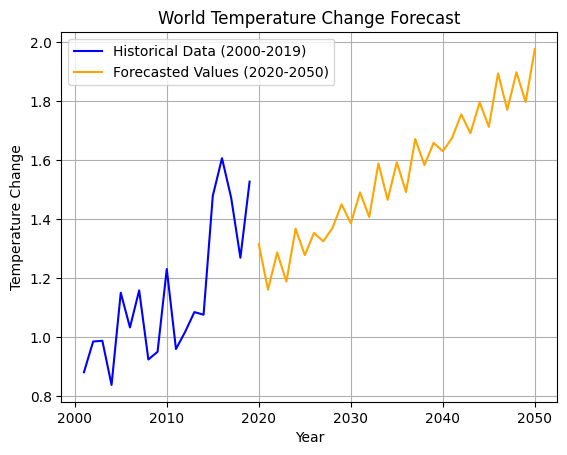

In [36]:
# Calculate yearly average of forecasted values
forecasted_values_yearly = []
for i in range(0, int(forecast_steps/12)):
    forecasted_values_yearly.append(np.mean(forecasted_values[i*12:(i*12)+12]))

# Plot historical data from 2000 to 2019
world_data = world_df.loc[(world_df["Year"]>2000)]
world_data = world_data.groupby("Year")["Temperature Change"].mean().reset_index()
plt.plot(world_data["Year"], world_data['Temperature Change'], color='blue', label='Historical Data (2000-2019)')

# Plot forecasted values starting from 2020
plt.plot(range(2020, 2020 + int(forecast_steps/12)), forecasted_values_yearly, color='orange', label='Forecasted Values (2020-2050)')

# Customize plot
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.title('World Temperature Change Forecast')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Visualize temperature changes in the world

In [11]:
country_iso3 = pd.read_csv('FAOSTAT_data_11-24-2020.csv')
country_iso3.head(2)

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN


In [12]:
# Delete unnecessary columns
country_iso3.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

# Rename useful columns
country_iso3.rename(columns={'Country':'Area','ISO3 Code':'country_code'},inplace=True)

# 'China, mainland' does not have the ISO3 code. Fix the problem by creating a filter...
filter_china = country_iso3['Area'] == 'China, mainland'

# ...and replace the ISO3 code 'CHN' to the right place
country_iso3[filter_china] = country_iso3[filter_china].fillna('CHN') 

# Do a merge between the two dataframe
df_temp = pd.merge(data, country_iso3, how='inner', on='Area')
df_temp.head(2)

,Area,Months,Months Code,Year,Temperature Change,country_code
0,Afghanistan,January,7001,1961,0.777,AFG
1,Afghanistan,February,7002,1961,-1.743,AFG
2,Afghanistan,March,7003,1961,0.516,AFG
3,Afghanistan,April,7004,1961,-1.709,AFG
4,Afghanistan,May,7005,1961,1.412,AFG


In [14]:
met_year = df_temp["Months"] == 'Meteorological year'

year_variations = df_temp.loc[met_year, ['country_code', 'Area', 'Year', 'Temperature Change']].reset_index(drop=True)

fig = px.choropleth(
    year_variations,
    locations='country_code',
    animation_frame='Year',

    color='Temperature Change',
    color_continuous_scale='balance',
    range_color=[-2, 2.5],

    hover_name='Area',
    hover_data=dict(country_code=None),
    
    labels=dict(
        years='Year',
        temp_changes="Temperature Change (°C)"))

fig.update_layout(    
    title = 'Worldwide Temperature Change by Countries from 1961 to 2019',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    dragmode=False,

    width=1000,
    height=600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()
